# **Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#for ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

# **DATA Loading**

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/445/445 Project/EDA Presentation/All EDA/Kidney/Fkidney.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
# dropping columns
df.drop(['id','sg','pcc','al','rbc','appet','sod','pot','bu'], axis=1,inplace=True)

In [ ]:
df.shape

(400, 17)

In [ ]:
df.columns = ['age', 'blood_pressure', 'sugar', 'pus_cell',
              'bacteria', 'blood_glucose_random', 'serum_creatinine',
              'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.head()

,age,blood_pressure,sugar,pus_cell,bacteria,blood_glucose_random,serum_creatinine,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,peda_edema,aanemia,class
0,48.0,80.0,0.0,normal,notpresent,121.0,1.2,15.4,44.0,7800.0,5.2,yes,yes,no,no,no,ckd
1,7.0,50.0,0.0,normal,notpresent,NaN,0.8,11.3,38.0,6000.0,NaN,no,no,no,no,no,ckd
2,62.0,80.0,3.0,normal,notpresent,423.0,1.8,9.6,31.0,7500.0,NaN,no,yes,no,no,yes,ckd
3,48.0,70.0,0.0,abnormal,notpresent,117.0,3.8,11.2,32.0,6700.0,3.9,yes,no,no,yes,yes,ckd
4,51.0,80.0,0.0,normal,notpresent,106.0,1.4,11.6,35.0,7300.0,4.6,no,no,no,no,no,ckd


In [ ]:
df.describe()

,age,blood_pressure,sugar,blood_glucose_random,serum_creatinine,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,391.000000,388.000000,351.000000,356.000000,383.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,0.450142,148.036517,3.072454,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,1.099191,79.281714,5.741126,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,0.000000,22.000000,0.400000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,0.000000,99.000000,0.900000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,0.000000,121.000000,1.300000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,0.000000,163.000000,2.800000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,5.000000,490.000000,76.000000,17.800000,54.000000,26400.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   sugar                    351 non-null    float64
 3   pus_cell                 335 non-null    object 
 4   bacteria                 396 non-null    object 
 5   blood_glucose_random     356 non-null    float64
 6   serum_creatinine         383 non-null    float64
 7   haemoglobin              348 non-null    float64
 8   packed_cell_volume       329 non-null    float64
 9   white_blood_cell_count   294 non-null    float64
 10  red_blood_cell_count     269 non-null    float64
 11  hypertension             398 non-null    object 
 12  diabetes_mellitus        398 non-null    object 
 13  coronary_artery_disease  398 non-null    object 
 14  peda_edema               3

In [ ]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   sugar                    351 non-null    float64
 3   pus_cell                 335 non-null    object 
 4   bacteria                 396 non-null    object 
 5   blood_glucose_random     356 non-null    float64
 6   serum_creatinine         383 non-null    float64
 7   haemoglobin              348 non-null    float64
 8   packed_cell_volume       329 non-null    float64
 9   white_blood_cell_count   294 non-null    float64
 10  red_blood_cell_count     269 non-null    float64
 11  hypertension             398 non-null    object 
 12  diabetes_mellitus        398 non-null    object 
 13  coronary_artery_disease  398 non-null    object 
 14  peda_edema               3

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

pus_cell has ['normal' 'abnormal' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>There is some ambugity present in the columns we have to remove that.</strong></p> 

In [ ]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [ ]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



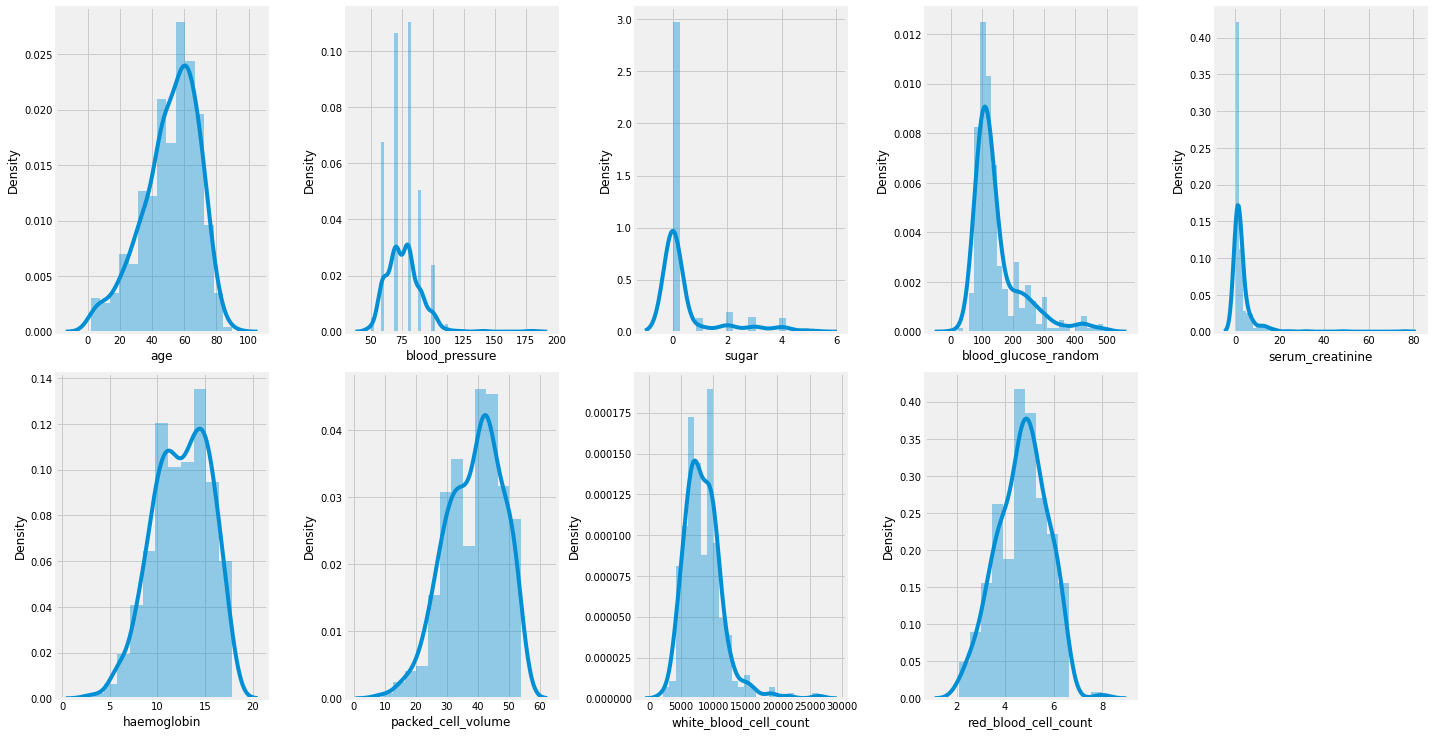

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Skewness is present in some of the columns.</strong></p> 

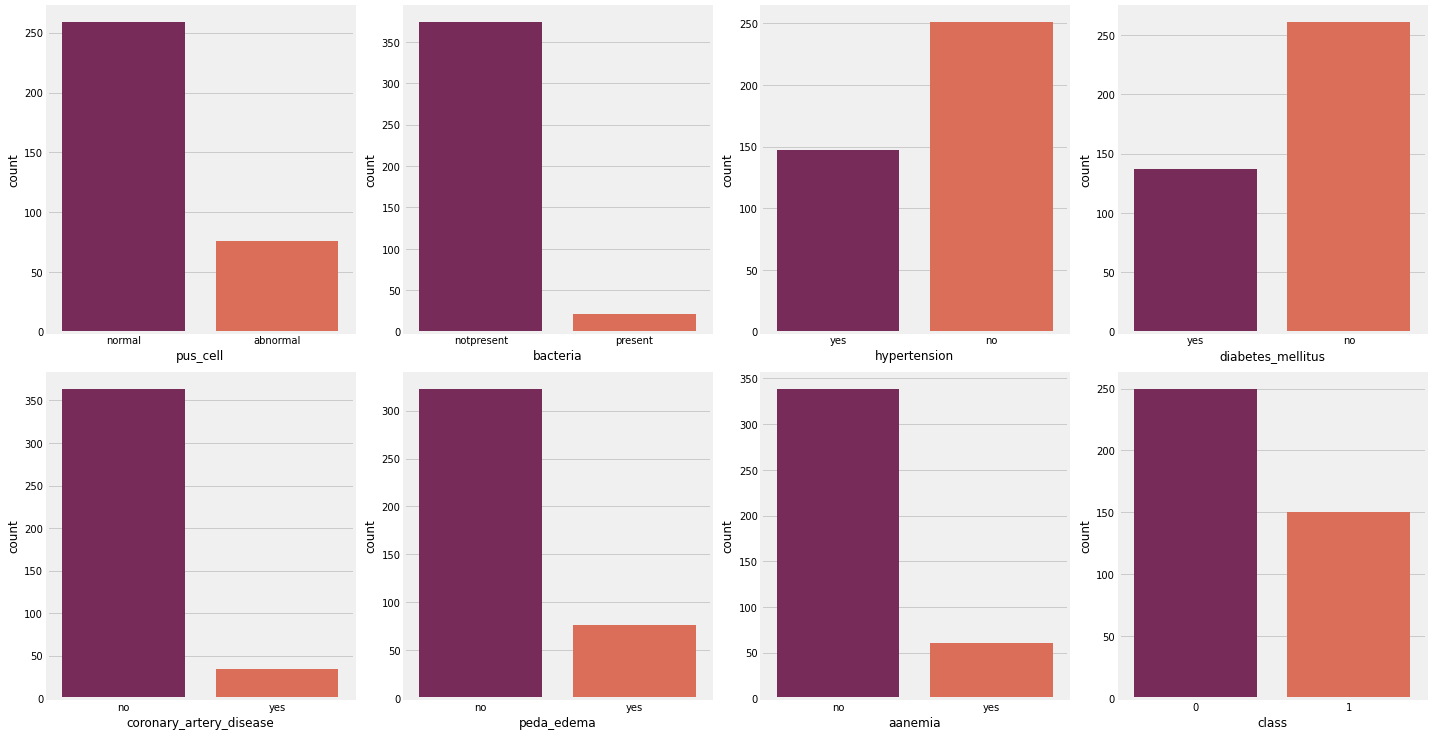

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

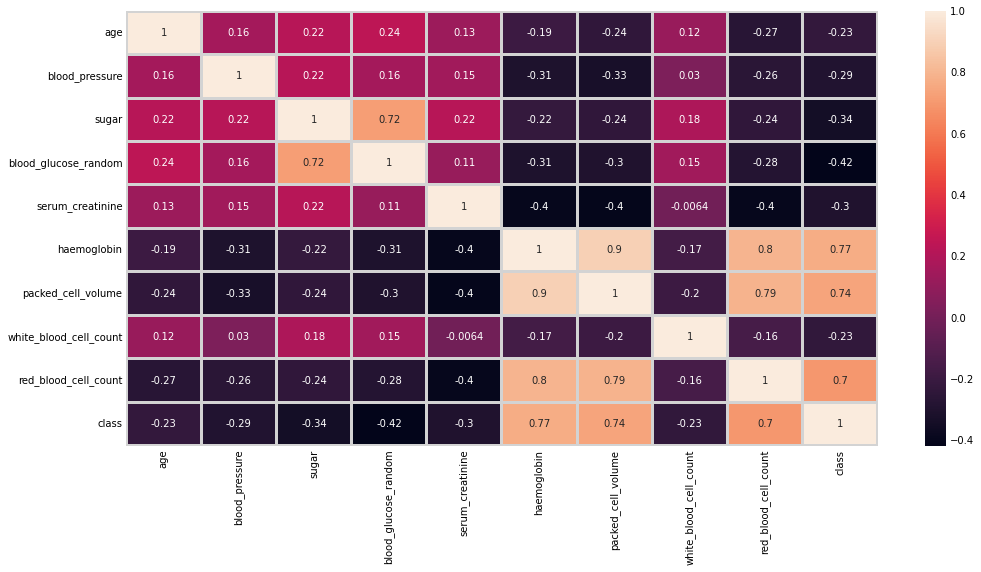

In [ ]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'sugar', 'pus_cell', 'bacteria',
       'blood_glucose_random', 'serum_creatinine', 'haemoglobin',
       'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [ ]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [ ]:
violin('red_blood_cell_count')

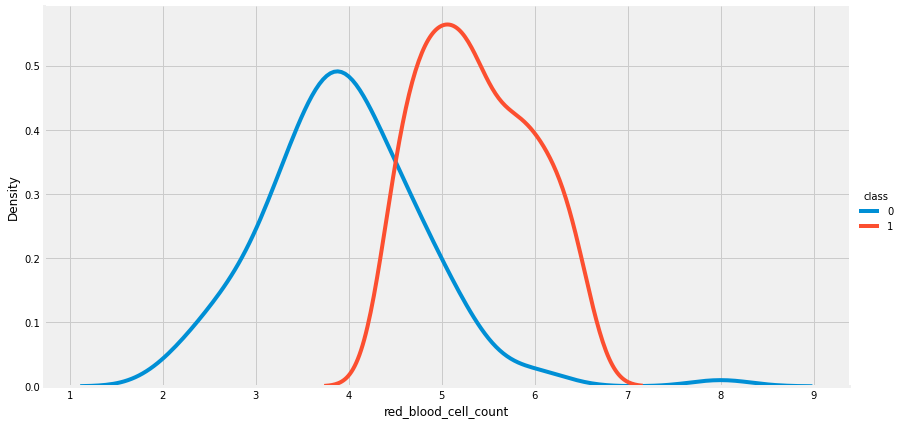

In [ ]:
kde('red_blood_cell_count')

In [ ]:
violin('white_blood_cell_count')

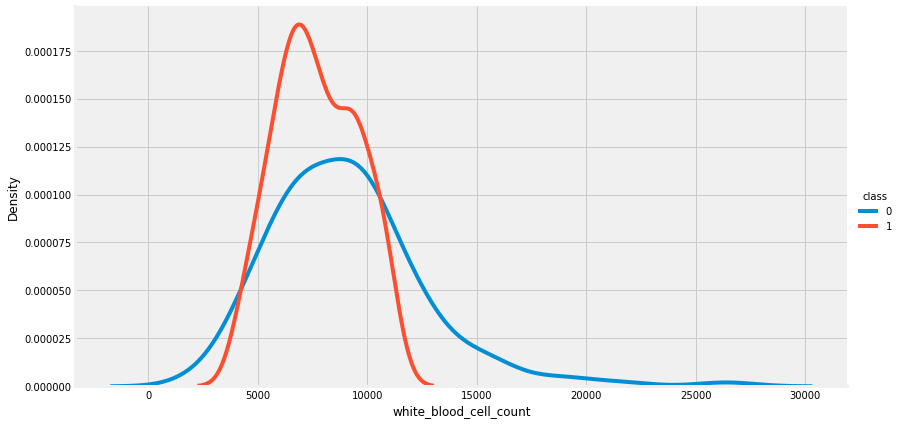

In [ ]:
kde('white_blood_cell_count')

In [ ]:
violin('packed_cell_volume')

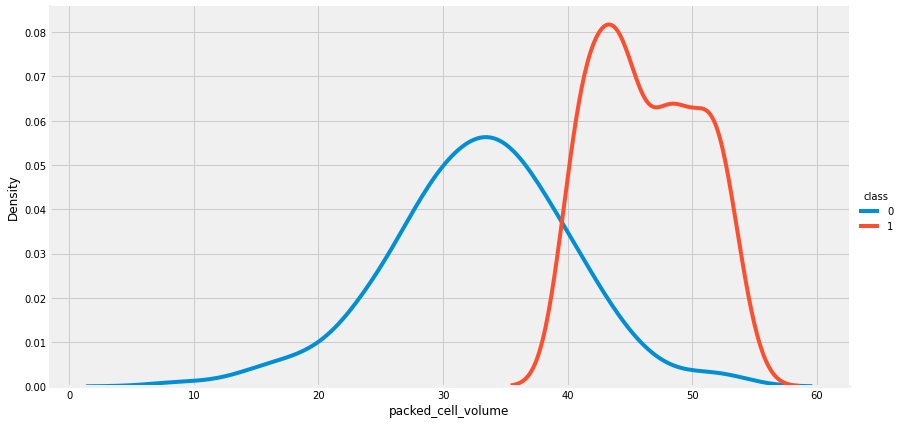

In [ ]:
kde('packed_cell_volume')

In [ ]:
violin('haemoglobin')

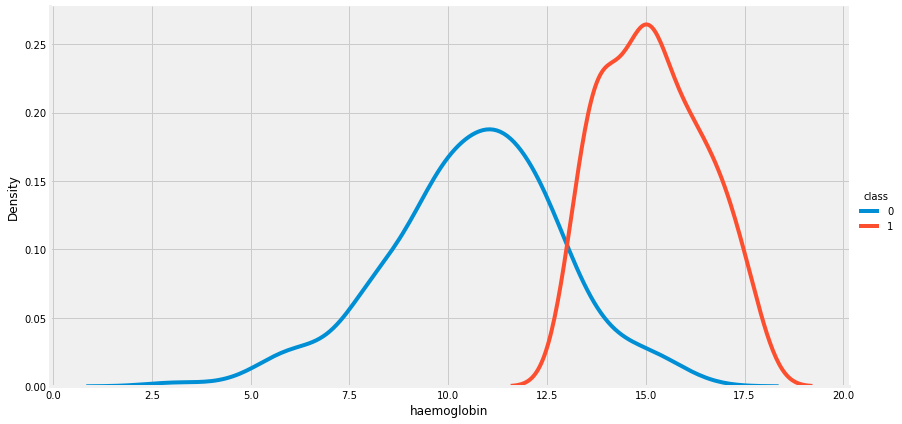

In [ ]:
kde('haemoglobin')

In [ ]:
violin('blood_glucose_random')

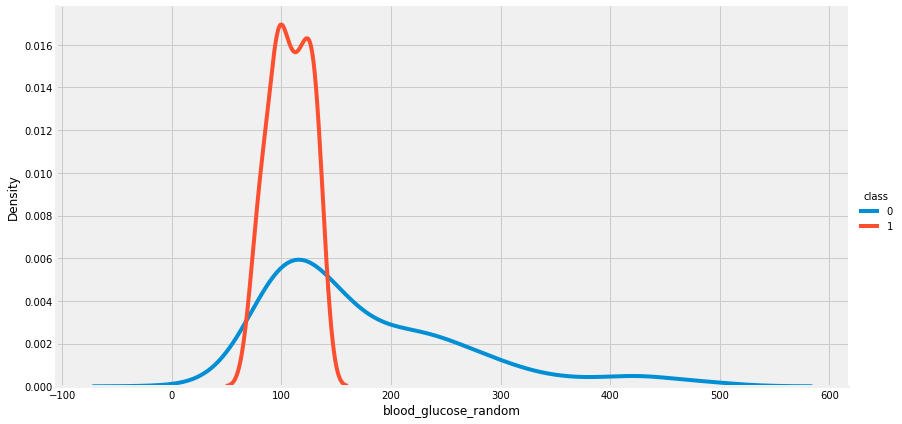

In [ ]:
kde('blood_glucose_random')

In [ ]:
scatter('haemoglobin', 'packed_cell_volume')

In [ ]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [ ]:
scatter('sugar', 'blood_glucose_random')

In [ ]:
px.bar(df, x="blood_pressure", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [ ]:
px.bar(df, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)

# **Data Pre Processing**

In [ ]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cell_count       131
white_blood_cell_count     106
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
blood_glucose_random        44
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [ ]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
sugar                      49
blood_glucose_random       44
serum_creatinine           17
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [ ]:
df[cat_cols].isnull().sum()

pus_cell                   65
bacteria                    4
hypertension                2
diabetes_mellitus           2
coronary_artery_disease     2
peda_edema                  1
aanemia                     1
class                       0
dtype: int64

In [ ]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [ ]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
sugar                     0
blood_glucose_random      0
serum_creatinine          0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [ ]:
# filling "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [ ]:
df[cat_cols].isnull().sum()

pus_cell                   0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

# **Feature Encoding**

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

pus_cell has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>As all of the categorical columns have 2 categories we can use label encoder</strong></p> 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,blood_pressure,sugar,pus_cell,bacteria,blood_glucose_random,serum_creatinine,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,peda_edema,aanemia,class
0,48.0,80.0,0.0,1,0,121.0,1.2,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,0.0,1,0,124.0,0.8,11.3,38.0,6000.0,3.3,0,0,0,0,0,0
2,62.0,80.0,3.0,1,0,423.0,1.8,9.6,31.0,7500.0,5.2,0,1,0,0,1,0
3,48.0,70.0,0.0,0,0,117.0,3.8,11.2,32.0,6700.0,3.9,1,0,0,1,1,0
4,51.0,80.0,0.0,1,0,106.0,1.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


# **Model Building**

In [ ]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [ ]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

<a id = '5.1'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>KNN</strong></p> 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc}")
print(f"______________________________________\n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}")
print(f"______________________________________\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.778125
Test Accuracy of KNN is 0.7375
______________________________________

Confusion Matrix :- 
[[41 11]
 [10 18]]
______________________________________

Classification Report :- 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        52
           1       0.62      0.64      0.63        28

    accuracy                           0.74        80
   macro avg       0.71      0.72      0.71        80
weighted avg       0.74      0.74      0.74        80



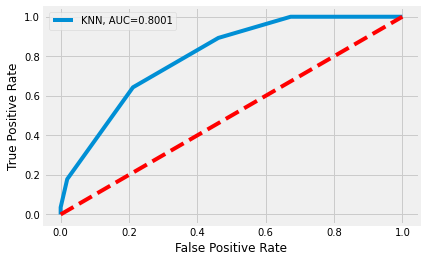

In [ ]:
#fit KNN model and plot ROC curve

y_pred = knn.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

<a id = '5.2'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Decision Tree Classifier</strong></p> 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc}")
print(f"______________________________________\n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}")
print(f"______________________________________\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.975
______________________________________

Confusion Matrix :- 
[[51  1]
 [ 1 27]]
______________________________________

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [ ]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}
0.971875


In [ ]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.965625
Test Accuracy of Decision Tree Classifier is 0.975 

Confusion Matrix :- 
[[50  2]
 [ 0 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



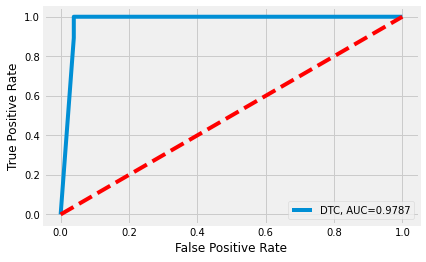

In [ ]:
#fit Decision Tree model and plot ROC curve

y_pred = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="DTC, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

<a id = '5.3'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc}")
print(f"______________________________________\n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"______________________________________\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.99375
Test Accuracy of Random Forest Classifier is 0.975
______________________________________

Confusion Matrix :- 
[[51  1]
 [ 1 27]]

______________________________________

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



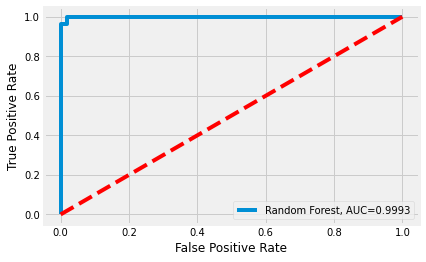

In [ ]:
#fit Random Forest model and plot ROC curve

y_pred = rd_clf.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc} \n")
print(f"______________________________________\n")
print("Confusion Matrix")
print(lr_conf_matrix)
print("\n")
print(f"Classification Report :- \n {classification_report(y_test, lr_predict)}")

Training Accuracy of Logistic Regression is 0.93125
Test Accuracy of Logistic Regression is 0.9375 

______________________________________

Confusion Matrix
[[48  4]
 [ 1 27]]


Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



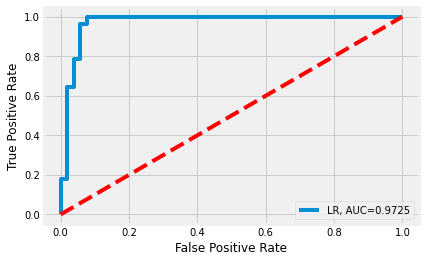

In [ ]:
#fit logistic regression model and plot ROC curve

y_pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LR, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

**SVM**

In [ ]:
# from sklearn.svm import SVC

# svc =  SVC(kernel='rbf', C=2,probability=True)
# svc.fit(X_train, y_train)

# svc_predict = svc.predict(X_test)
# svc_conf_matrix = confusion_matrix(y_test, svc_predict)
# svc_acc= accuracy_score(y_test,svc.predict(X_test))

# #lr_acc = accuracy_score(y_test, lr.predict(X_test))

# print(f"Training Accuracy of SVC is {accuracy_score(y_train, svc.predict(X_train))}")
# print(f"Test Accuracy of SVC is {svc_acc} \n")

# print("Confusion matrix")
# print(svc_conf_matrix)
# print("\n")
# print(classification_report(y_test,svc_predict))

In [ ]:
# #diff kernal
# svc =  SVC(kernel='sigmoid', C=2,probability=True)
# svc.fit(X_train, y_train)

# svc_predict = svc.predict(X_test)
# svc_conf_matrix = confusion_matrix(y_test, svc_predict)
# svc_acc= accuracy_score(y_test,svc.predict(X_test))

# #lr_acc = accuracy_score(y_test, lr.predict(X_test))

# print(f"Training Accuracy of SVC is {accuracy_score(y_train, svc.predict(X_train))}")
# print(f"Test Accuracy of SVC is {svc_acc} \n")

# print("Confusion matrix")
# print(svc_conf_matrix)
# print("\n")
# print(classification_report(y_test,svc_predict))

In [ ]:
# #diff kernal
# svc =  SVC(kernel='poly', C=2,probability=True)
# svc.fit(X_train, y_train)

# svc_predict = svc.predict(X_test)
# svc_conf_matrix = confusion_matrix(y_test, svc_predict)
# svc_acc= accuracy_score(y_test,svc.predict(X_test))

# #lr_acc = accuracy_score(y_test, lr.predict(X_test))

# print(f"Training Accuracy of SVC is {accuracy_score(y_train, svc.predict(X_train))}")
# print(f"Test Accuracy of SVC is {svc_acc} \n")

# print("Confusion matrix")
# print(svc_conf_matrix)
# print("\n")
# print(classification_report(y_test,svc_predict))

In [ ]:
from sklearn.svm import SVC
#diff kernal
svc =  SVC(kernel='linear', C=2,probability=True)
svc.fit(X_train, y_train)

svc_predict = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
svc_acc= accuracy_score(y_test,svc.predict(X_test))

#lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of SVC is {accuracy_score(y_train, svc.predict(X_train))}")
print(f"Test Accuracy of SVC is {svc_acc} \n")

print("Confusion matrix")
print(svc_conf_matrix)
print("\n")
print(classification_report(y_test,svc_predict))

Training Accuracy of SVC is 0.9375
Test Accuracy of SVC is 0.95 

Confusion matrix
[[48  4]
 [ 0 28]]


              precision    recall  f1-score   support

           0       1.00      0.92      0.96        52
           1       0.88      1.00      0.93        28

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



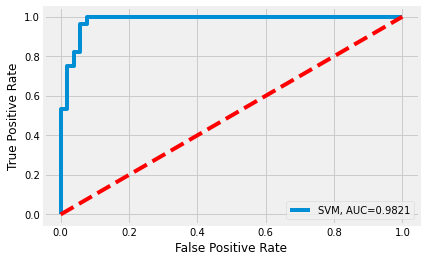

In [ ]:
#fit SVM model and plot ROC curve

y_pred = svc.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

<a id = '5.10'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>LGBM Classifier</strong></p>

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 0.9875 

[[51  1]
 [ 0 28]]

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



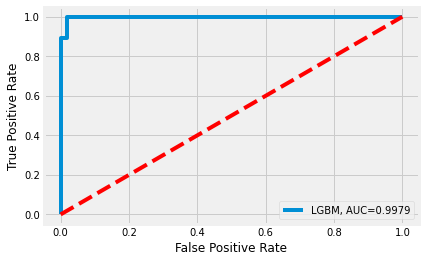

In [ ]:
#fit LGBM model and plot ROC curve

y_pred = lgbm.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LGBM, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Models Comparison</strong></p> 

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Logistic Regression','SVM','LGBM Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc,lr_acc,svc_acc,lgbm_acc]
})


models.sort_values(by = 'Score', ascending = True)

,Model,Score
0,KNN,0.7375
3,Logistic Regression,0.9375
4,SVM,0.9500
1,Decision Tree Classifier,0.9750
2,Random Forest Classifier,0.9750
5,LGBM Classifier,0.9875


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

In [ ]:
import pickle
filehandler = open(b"kidney.pkl","wb")
pickle.dump(rd_clf,filehandler)
# filename = "kidney.pkl"
# pickle.dump(rd_clf,open((filename,"wb"))